In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#import time
from collections import Counter
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json
from scipy.cluster.hierarchy import dendrogram, linkage
import math

In [2]:
data = pd.read_csv('../../data/therapist_profiles.csv')
with open("../../data/profiledict.json", "r") as fd:
    profiledict = json.load(fd)
with open("../../data/profilefeatures_bool_dict.json", "r") as fd:
    featuresdict = json.load(fd)

In [3]:
## number of different treatment orientations
len(profiledict['treatmentorientation']['counts'].keys())

2317

In [4]:
## boolean dataframe of indicator variable for treatments with >10 endorsements
to_df = pd.DataFrame(featuresdict['treatmentorientation'])

In [9]:
cooccurence_t = []
cooccurence_d = {}
for ind,col in enumerate(to_df.iloc[:,:-1]):
    for ind2, col2 in enumerate(to_df.iloc[:,ind+1:]):
        cooccurence = np.sum(to_df[col] & to_df[col2])
        name = "{} & {}".format(col, col2)
        cooccurence_d[name] = cooccurence
        cooccurence_t.append((col, col2, cooccurence))

In [10]:
cooccurence_d['art therapy & coaching']

279L

In [172]:
df.sum().sort_values()

attachment                      11
emdr                            12
lgbtq                           12
stress management               13
christian counseling            19
medical detox                   62
hoarding                       106
sports performance             223
medication management          259
alzheimer                      300
none                           335
racial identity                362
chronic illness                379
intellectual disability        431
traumatic brain injury         442
testing and evaluation         545
antisocial personality         570
video game addiction           576
sex therapy                    642
chronic relapse                662
gambling                       694
autism                         710
developmental disorders        806
narcissistic personality       822
learning disabilities          856
pregnancy                      906
obesity                        930
infertility                    938
men                 

In [174]:
5532.0*40 / len(df)

28.89904662400418

In [5]:
import igraph as ig

In [109]:
to_df['animal assisted therapy'].sum()*to_df['psychodynamic'].sum()*1.0 /  len(to_df)

2.7151625963170956

In [313]:
def get_edges_weights(df):
    edges = []
    edge_weights = []
    for ind,col in enumerate(df):
        for ind2, col2 in enumerate(df):
            if ind >= ind2: continue
            expected = df[col].sum()*df[col2].sum()*1.0 / len(df)
            observed = np.sum(df[col] & df[col2])*1.0
            if observed >= 3*expected:
                edges.append((ind,ind2))
                edge_weights.append(observed)
    return edges, edge_weights, 

In [314]:
# get vertices names, edges, weights
df = pd.DataFrame(featuresdict['issues'])
items = list(df)
edges, edge_weights = get_edges_weights(df)

# initialize graph vertices, edges, weights, and names
g = ig.Graph(len(items))
g.add_edges(edges)
g.vs['name'] = items
g.vs["label"] = g.vs["name"]
g.es['weight'] = edge_weights

In [315]:
s = g.vs.select(_degree_eq=0)
g.delete_vertices(s)

In [316]:
v_size = df[g.vs['name']].sum()

In [317]:
len(g.vs)

41

In [318]:
np.log10(6)

0.77815125038364363

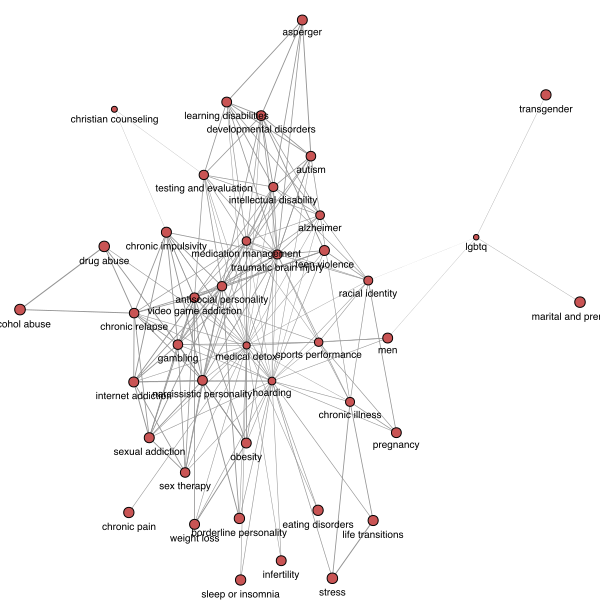

In [338]:
layout = g.layout('auto')
visual_style = {}
visual_style["vertex_size"] = np.log(v_size) + 3
visual_style["vertex_color"] = '#c95454'
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = np.log10(edge_weights)/3
visual_style["edge_color"] = '#939393'
visual_style["layout"] = layout
visual_style['vertex_label_size'] = 10
visual_style['vertex_label_dist'] = 2
#visual_style["bbox"] = (300, 300)
#visual_style["margin"] = 20
ig.plot(g, **visual_style)

In [331]:
layout = g.layout('auto')
visual_style = {}
visual_style["vertex_size"] = np.log(v_size) + 3
visual_style["colors"] = '#c95454'
visual_style["vertex_label"] = g.vs["name"]
#visual_style["edge_width"] = np.log10(edge_weights)/3
visual_style["edge_color"] = '#939393'
visual_style["layout"] = layout
visual_style['font_size'] = 10

#visual_style["bbox"] = (300, 300)
#visual_style["margin"] = 20
